<a href="https://colab.research.google.com/github/joeyuy/Seattle-Weather/blob/main/DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

Data is sourced from the National Oceanic and Atmospheric Administration (NOAA), and is filtered to include data from select weather stations in the Seattle and New York areas from 01/01/2020 to 01/01/2024.

All precipitation data can be accessed at https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND

##Import libraries

Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
from google.colab import files

## Load the data

Load the Seattle data set

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/joeyuy/Seattle-Weather/main/seattle_rain.csv')

Load the New York data set

In [3]:
df_ny = pd.read_csv('https://raw.githubusercontent.com/joeyuy/Seattle-Weather/main/ny_rain.csv')

## Explore the Contents of the Datasets

Inspecting raw data frames, raw data sizes, data types, and presence of NaN's

In [4]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [5]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [6]:
df_seattle.columns.unique() == df_seattle.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [7]:
set(df_seattle.columns) == set(df_ny.columns)

True

In [8]:
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

Changing DATE dtype

In [9]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

In [10]:
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [11]:
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [12]:
df_seattle.shape

(7003, 13)

In [13]:
df_ny.shape

(17465, 13)

In [14]:
len(df_seattle["STATION"].unique())
#df_seattle["PRCP"].sum()

10

In [15]:
len(df_ny["STATION"].unique())
#df_ny["PRCP"].sum()

20

In [16]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


In [17]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    17465 non-null  object        
 1   NAME       17465 non-null  object        
 2   LATITUDE   17465 non-null  float64       
 3   LONGITUDE  17465 non-null  float64       
 4   ELEVATION  17465 non-null  float64       
 5   DATE       17465 non-null  datetime64[ns]
 6   DAPR       155 non-null    float64       
 7   MDPR       151 non-null    float64       
 8   PRCP       17275 non-null  float64       
 9   SNOW       11508 non-null  float64       
 10  SNWD       6318 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.7+ MB


##Averaging precipitation to address station mismatch

Creating simplified data frames with average PRCP by DATE

In [40]:
df_seattle_avg = df_seattle.groupby(by="DATE", as_index = False)["PRCP"].mean()
df_ny_avg = df_ny.groupby(by="DATE", as_index = False)["PRCP"].mean()

In [19]:
df_seattle_avg

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571
...,...,...
1456,2023-12-27,0.063333
1457,2023-12-28,0.240000
1458,2023-12-29,0.055000
1459,2023-12-30,0.042500


In [20]:
df_ny_avg

,DATE,PRCP
0,2020-01-01,0.013333
1,2020-01-02,0.000000
2,2020-01-03,0.134444
3,2020-01-04,0.200000
4,2020-01-05,0.040000
...,...,...
1456,2023-12-27,0.051538
1457,2023-12-28,1.845000
1458,2023-12-29,0.103571
1459,2023-12-30,0.006429


Clean simplified data frames

In [21]:
df_seattle_avg = df_seattle_avg.drop_duplicates(subset="DATE")
df_ny_avg = df_ny_avg.drop_duplicates(subset="DATE")

In [22]:
# check for NaN's

df_seattle_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [23]:
df_ny_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [24]:
df_seattle_avg["PRCP"] =  df_seattle_avg["PRCP"].interpolate()

In [25]:
#checking if NaN still exists

df_seattle_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [26]:
#make sure DATE has all unique values and proper

print(len(df_seattle_avg["DATE"].unique()),len(df_ny_avg["DATE"].unique()))
print(df_seattle_avg["DATE"].unique() == df_ny_avg["DATE"].unique())

1461 1461
[ True  True  True ...  True  True  True]


##Combining dataframes

Merging into a single data frame that will be plot friendly

In [27]:
df = df_seattle_avg[['DATE','PRCP']].merge(df_ny_avg[['DATE','PRCP']], on = 'DATE', how = 'left')
df

,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.162500,0.013333
1,2020-01-02,0.181250,0.000000
2,2020-01-03,0.267500,0.134444
3,2020-01-04,0.172000,0.200000
4,2020-01-05,0.168571,0.040000
...,...,...,...
1456,2023-12-27,0.063333,0.051538
1457,2023-12-28,0.240000,1.845000
1458,2023-12-29,0.055000,0.103571
1459,2023-12-30,0.042500,0.006429


In [28]:
df = pd.melt(df, id_vars = "DATE", var_name = "CITY", value_name = "PRCP")
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'Seattle'
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'New York'

df

,DATE,CITY,PRCP
0,2020-01-01,Seattle,0.162500
1,2020-01-02,Seattle,0.181250
2,2020-01-03,Seattle,0.267500
3,2020-01-04,Seattle,0.172000
4,2020-01-05,Seattle,0.168571
...,...,...,...
2917,2023-12-27,New York,0.051538
2918,2023-12-28,New York,1.845000
2919,2023-12-29,New York,0.103571
2920,2023-12-30,New York,0.006429


In [29]:
mapping_dict = {'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'}

In [30]:
df_tidy = df.rename(columns=mapping_dict)
df_tidy

,date,city,precipitation
0,2020-01-01,Seattle,0.162500
1,2020-01-02,Seattle,0.181250
2,2020-01-03,Seattle,0.267500
3,2020-01-04,Seattle,0.172000
4,2020-01-05,Seattle,0.168571
...,...,...,...
2917,2023-12-27,New York,0.051538
2918,2023-12-28,New York,1.845000
2919,2023-12-29,New York,0.103571
2920,2023-12-30,New York,0.006429


Verifying tidied data frame data cleanliness

<Axes: >

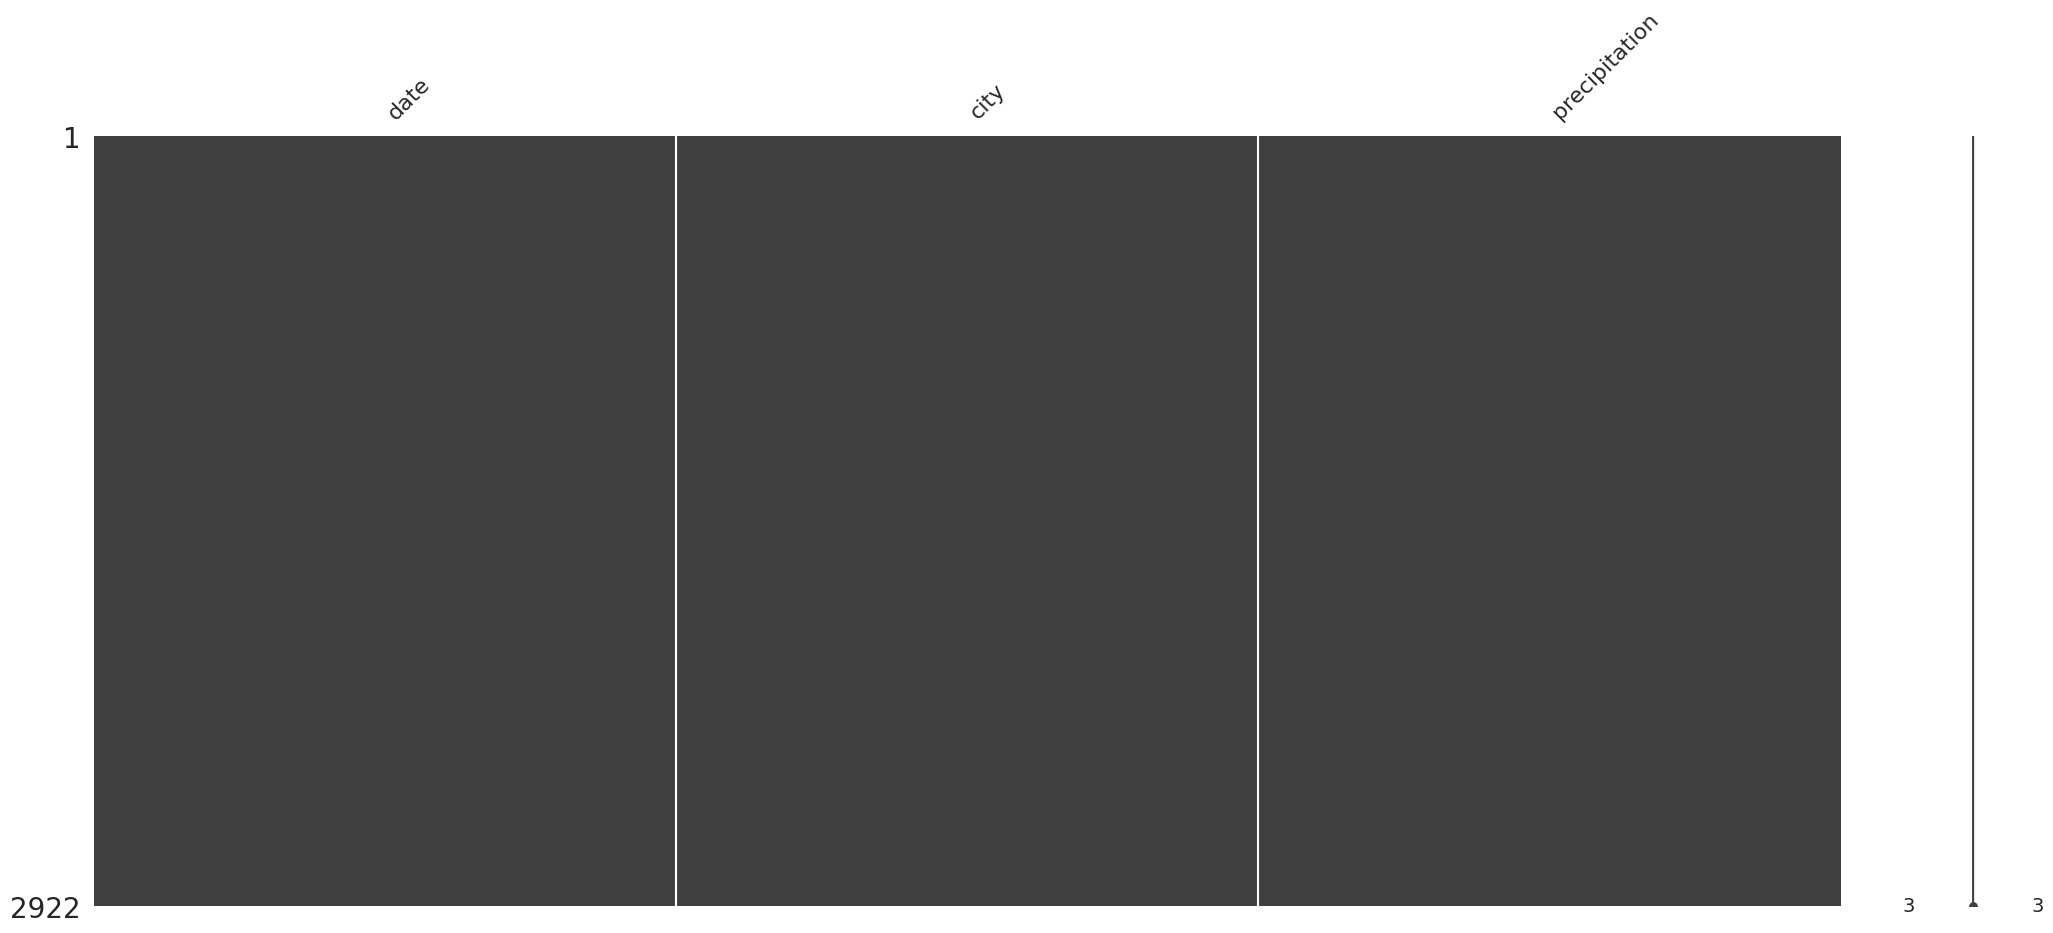

In [31]:
msno.matrix(df_tidy)

In [32]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2922 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


In [33]:
df_tidy.describe()

,date,precipitation
count,2922,2922.000000
mean,2021-12-31 00:00:00,0.124740
min,2020-01-01 00:00:00,0.000000
25%,2020-12-31 00:00:00,0.000000
50%,2021-12-31 00:00:00,0.013333
75%,2022-12-31 00:00:00,0.126859
max,2023-12-31 00:00:00,4.244615
std,NaN,0.273386


# Creating new columns

Creating new variables to help with plotting

In [34]:
df_tidy['month'] = pd.DatetimeIndex(df_tidy['date']).month

In [35]:
season = []
for i in range(len(df_tidy['month'])):
  if df_tidy['month'][i] in [3,4,5]:
    season.append("Spring")
  elif df_tidy['month'][i] in [6,7,8]:
    season.append("Summer")
  elif df_tidy['month'][i] in [9,10,11]:
    season.append("Fall")
  elif df_tidy['month'][i] in [12,1,2]:
    season.append("Winter")

df_tidy["season"] = season

Looking into rain classifications based on: https://weatherins.com/rain-guidelines/

In [36]:
classification = []
for i in range(len(df_tidy['precipitation'])):
  if df_tidy['precipitation'][i] <= 0.01:
    classification.append("None")
  elif df_tidy['precipitation'][i] <= 0.1:
    classification.append("Very Light")
  elif df_tidy['precipitation'][i] <= 0.25:
    classification.append("Light")
  elif df_tidy['precipitation'][i] <= 0.5:
    classification.append("Moderate")
  elif df_tidy['precipitation'][i] <= .75:
    classification.append("Moderate Heavy")
  elif df_tidy['precipitation'][i] <= 1:
    classification.append("Heavy")
  else:
    classification.append("Very Heavy")

df_tidy["class"] = classification

In [37]:
df_tidy

,date,city,precipitation,month,season,class
0,2020-01-01,Seattle,0.162500,1,Winter,Light
1,2020-01-02,Seattle,0.181250,1,Winter,Light
2,2020-01-03,Seattle,0.267500,1,Winter,Moderate
3,2020-01-04,Seattle,0.172000,1,Winter,Light
4,2020-01-05,Seattle,0.168571,1,Winter,Light
...,...,...,...,...,...,...
2917,2023-12-27,New York,0.051538,12,Winter,Very Light
2918,2023-12-28,New York,1.845000,12,Winter,Very Heavy
2919,2023-12-29,New York,0.103571,12,Winter,Light
2920,2023-12-30,New York,0.006429,12,Winter,None


## Export CSV

Turning data frame into csv file

In [38]:
df_tidy.to_csv('cleaned_sea_ny_rain.csv', encoding='utf-8', index=False)

In [39]:
df_check = pd.read_csv('cleaned_sea_ny_rain.csv')
df_check

,date,city,precipitation,month,season,class
0,2020-01-01,Seattle,0.162500,1,Winter,Light
1,2020-01-02,Seattle,0.181250,1,Winter,Light
2,2020-01-03,Seattle,0.267500,1,Winter,Moderate
3,2020-01-04,Seattle,0.172000,1,Winter,Light
4,2020-01-05,Seattle,0.168571,1,Winter,Light
...,...,...,...,...,...,...
2917,2023-12-27,New York,0.051538,12,Winter,Very Light
2918,2023-12-28,New York,1.845000,12,Winter,Very Heavy
2919,2023-12-29,New York,0.103571,12,Winter,Light
2920,2023-12-30,New York,0.006429,12,Winter,NaN
